## 문제 정의(목표)

500명의 키와 몸무게,성별 데이터를 가지고 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자

## 데이터 수집

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
bmi = pd.read_csv('bmi_500.csv',index_col = "Label")
#import utf-8,utf-8-sig,euc-kr

In [14]:
bmi

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


## 데이터 전처리 : 전처리 스킵

(이 데이터는 전처리 할것이 없다)

## 탐색적 데이터 분석

In [15]:
bmi.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [16]:
bmi.info()
#.info(): 전체 데이터의 정보를 보기
#전체 데이터 개수,칼럼의 개수, 결측치의 수 , 각 칼럼의 타입 등이 나온다.

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 31.8+ KB


In [17]:
bmi.describe()
#.describe()는 분석

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [18]:
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

#### 시각화

In [19]:
#def로 함수정의
def myScatter(label,color):
    
    #tmp는
    tmp = bmi.loc[label]
    
    #산점도 설정.
    plt.scatter(tmp['Weight'],
                tmp['Height'],
                c = color, 
                label  = label)
    

<function matplotlib.pyplot.show(close=None, block=None)>

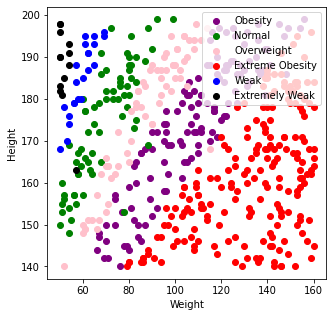

In [20]:
plt.figure(figsize=(5,5))

#함수표시
myScatter("Obesity", 'purple')
myScatter("Normal",'green')
myScatter("Overweight",'pink')
myScatter('Extreme Obesity','red')
myScatter('Weak',"blue")
myScatter('Extremely Weak',"black")

#범례
plt.legend(loc="upper right")
#x라벨 설정
plt.xlabel("Weight")
#y라벨 설정
plt.ylabel('Height')
#띄우기
plt.show

## 모델링(모델 선택)

In [29]:
bmi = pd.read_csv('bmi_500.csv')
#import utf-8,utf-8-sig,euc-kr
bmi

#위에서 label을 칼럼으로 써서 슬라이싱이 안됬음

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [30]:
x = bmi.loc[:,'Height':'Weight']
y = bmi.loc[:,'Label']

In [31]:
print(x.shape)

(500, 2)


In [32]:
print(y.shape)

(500,)


In [33]:
#train
x_train = x.iloc[:350,:]
#test
x_test = x.iloc[350:,:]
#train_label
y_train = y.iloc[:350]
#test_label
y_test = y.iloc[350:]

#모델 선택을위해 데이터를 나눔

In [34]:
print(x_train)

     Height  Weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
345     184     106
346     191      68
347     162      58
348     178     138
349     157      60

[350 rows x 2 columns]


In [35]:
print(x_test)

     Height  Weight
350     184      83
351     197      88
352     160      51
353     184     153
354     190      50
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[150 rows x 2 columns]


In [36]:
print(y_train)

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
345            Obesity
346             Normal
347             Normal
348    Extreme Obesity
349             Normal
Name: Label, Length: 350, dtype: object


In [37]:
print(y_test.shape)

(150,)


### 모델 생성

In [59]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
#knn(최근접 이웃) 모델 선택 
#15개 모델 참조

In [60]:
knn_model.fit(x_train,y_train)
#모델을 컴퓨터에 넣음

KNeighborsClassifier(n_neighbors=15)

In [61]:
pred = knn_model.predict(x_test)
#예측값 추가

In [62]:
pred

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Extremely Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Weak', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Normal', 'Extreme Obesity',
       'Obesity', 'Overweight', 'Normal', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Overweight',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Normal', 'Obesity', 'Obesity', 'Extreme Obesity',
       'Normal', 'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Normal', 'Obesity', 'Extreme O

In [63]:
metrics.accuracy_score(pred,y_test)
#정답값과 대조
#89.33333333333퍼센트로 정확함
#정확도는 0~1 범위 내에서 나옴

0.8933333333333333

In [64]:
knn_model.predict([[177,72]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)